In [1]:
import warnings
warnings.filterwarnings('ignore')    # to ignore the warnings in the coding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv('migration.csv')
data

,Country Name,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012
0,Arab World,-485569,-849826,-876979,1697107,103693,-1021606,293332,-1432980,396646,4413525,-1168750
1,Caribbean small states,-247909,-316430,-289373,-284532,-303086,-387993,-249602,-181604,-174651,-127609,-124122
2,Central Europe and the Baltics,112936,-227571,-104933,-85960,-279101,-819390,-1514119,-1176975,-593078,-811784,-770310
3,Early-demographic dividend,-1127882,-2453929,-3192784,-4981537,1228808,-1903124,-8288636,-7729474,-14370853,-14314078,-12621653
4,East Asia & Pacific,-479477,628975,-808879,-1454415,713290,392043,-2395809,-385097,-2992651,-5719538,-1457489
...,...,...,...,...,...,...,...,...,...,...,...,...
228,Vietnam,0,0,0,-813123,-324942,-332327,-394236,-216001,-772336,-877681,-200002
229,Virgin Islands (U.S.),10270,3245,9407,1961,-3492,-11156,-4618,-3936,-5272,-6191,-3604
230,"Yemen, Rep.",-100000,-245662,-353000,-75000,-50000,-50000,672800,-100000,-100000,0,-50000
231,Zambia,2500,-4245,26662,17573,58483,2822,-22952,79445,-93014,-124044,-34490


In [4]:
new_data = data.drop('Country Name', axis=1)

In [5]:
new_data.isnull().sum()

1962    0
1967    0
1972    0
1977    0
1982    0
1987    0
1992    0
1997    0
2002    0
2007    0
2012    0
dtype: int64

In [6]:
new_data.dtypes

1962    int64
1967    int64
1972    int64
1977    int64
1982    int64
1987    int64
1992    int64
1997    int64
2002    int64
2007    int64
2012    int64
dtype: object

In [7]:
new_data.columns

Index(['1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002',
       '2007', '2012'],
      dtype='object')

In [8]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)

In [9]:
sse

[1.1596017916518078e+16,
 7211210986750269.0,
 3445145285493554.0,
 2324251461491304.0,
 1578736305284471.8,
 1409190618428449.0,
 1227264372403047.8,
 1076476789437348.0,
 978959047011583.9,
 854677030031076.0,
 780271419739023.2,
 705906485009213.4,
 621648178765804.0,
 552714473858611.9,
 531086017063441.75]

Text(0, 0.5, 'sse')

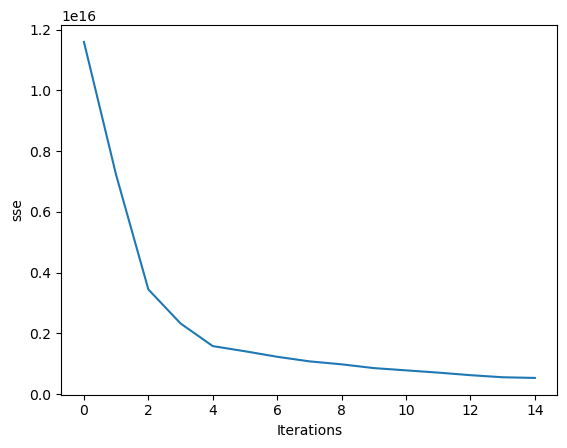

In [10]:
plt.plot(sse)
plt.xlabel('Iterations')
plt.ylabel('sse')

In [13]:
km_model = KMeans(n_clusters=2)
prediction = km_model.fit_predict(new_data)

In [14]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

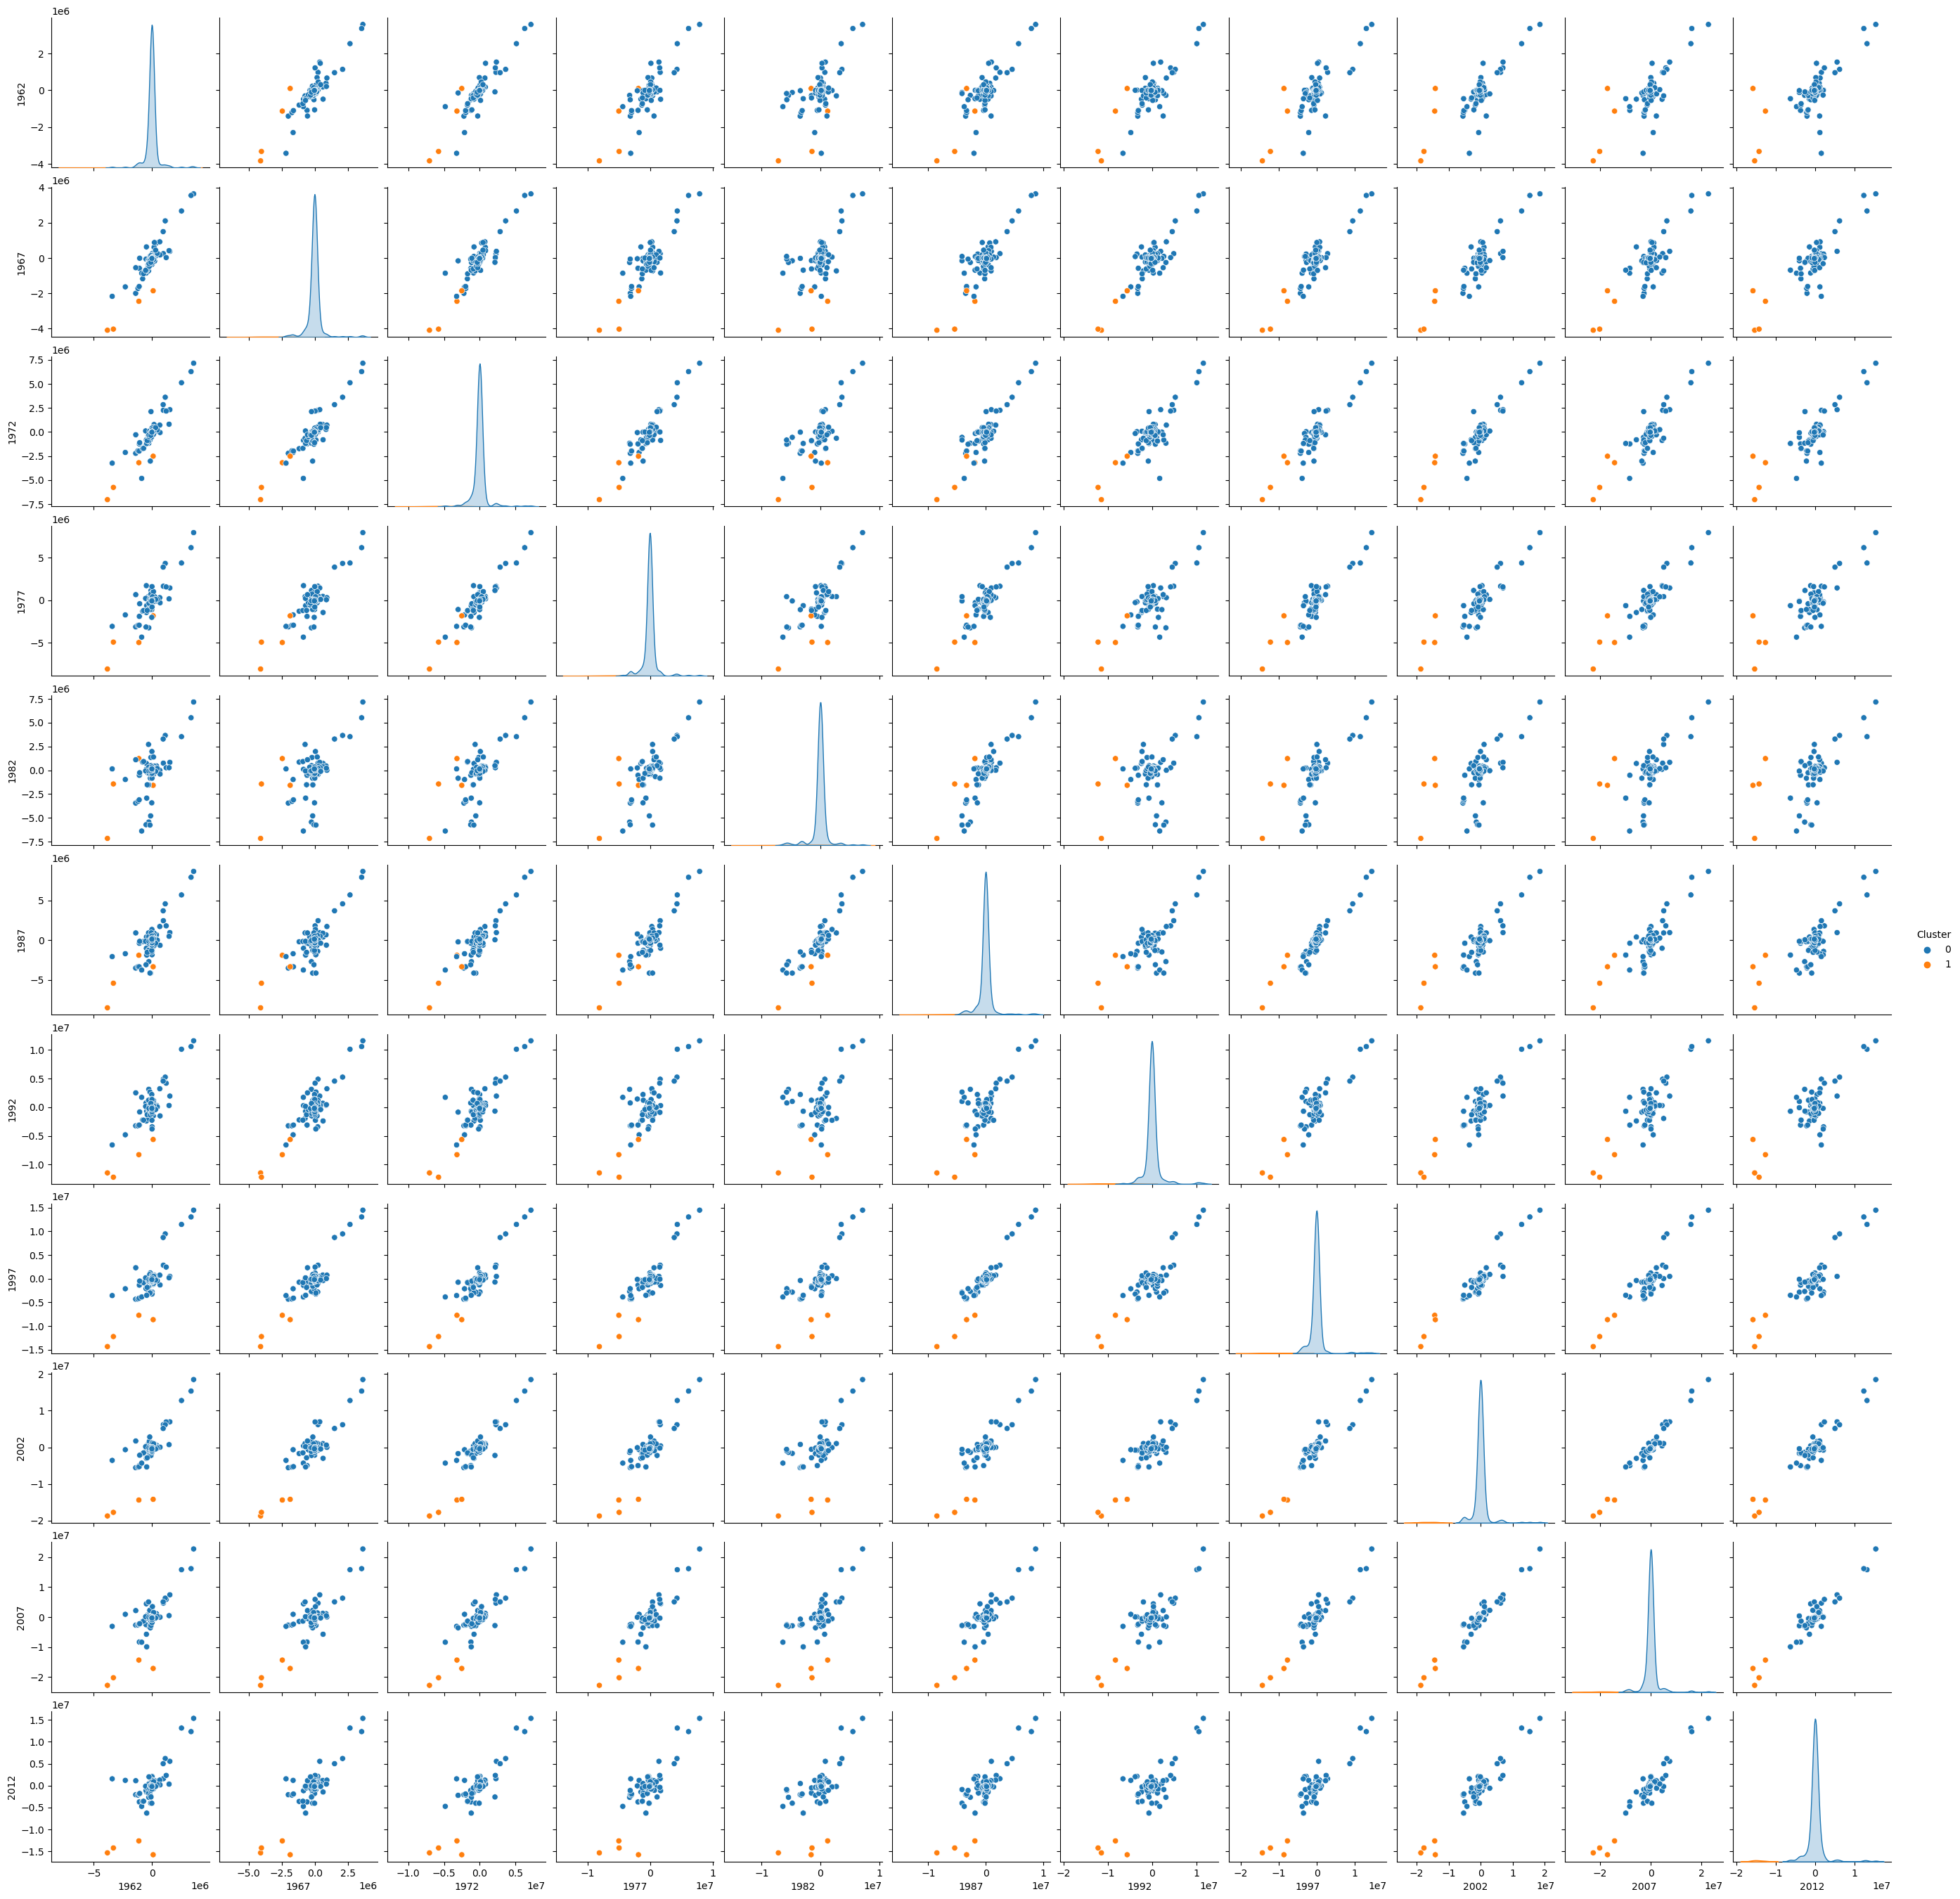

In [28]:
df = pd.DataFrame(data)
df['Cluster'] = prediction  # Assuming y_predict contains the cluster labels

# Plot the pairplot
sns.pairplot(df, hue='Cluster')
# plt.show()

In [16]:
clustered_result = pd.DataFrame({'Country': data['Country Name'], 'Cluster': prediction})

In [17]:
clustered_result

,Country,Cluster
0,Arab World,0
1,Caribbean small states,0
2,Central Europe and the Baltics,0
3,Early-demographic dividend,1
4,East Asia & Pacific,0
...,...,...
228,Vietnam,0
229,Virgin Islands (U.S.),0
230,"Yemen, Rep.",0
231,Zambia,0


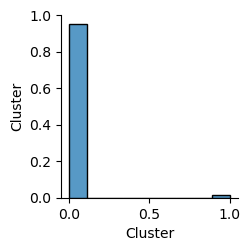

In [20]:
sns.pairplot(clustered_result)

In [19]:
clustered_result['Cluster'].value_counts()

Cluster
0    229
1      4
Name: count, dtype: int64